In [63]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/salsa/Downloads/StudentScore.csv")
count=df.isnull().sum()
print(count)
df.head()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [64]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
numerical_columns = df.select_dtypes(include=np.number).columns

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound))

outlier_columns = outliers.any()
outlier_counts = outliers.sum()
print(outlier_counts)

NrSiblings      291
MathScore        76
ReadingScore     90
WritingScore    109
dtype: int64


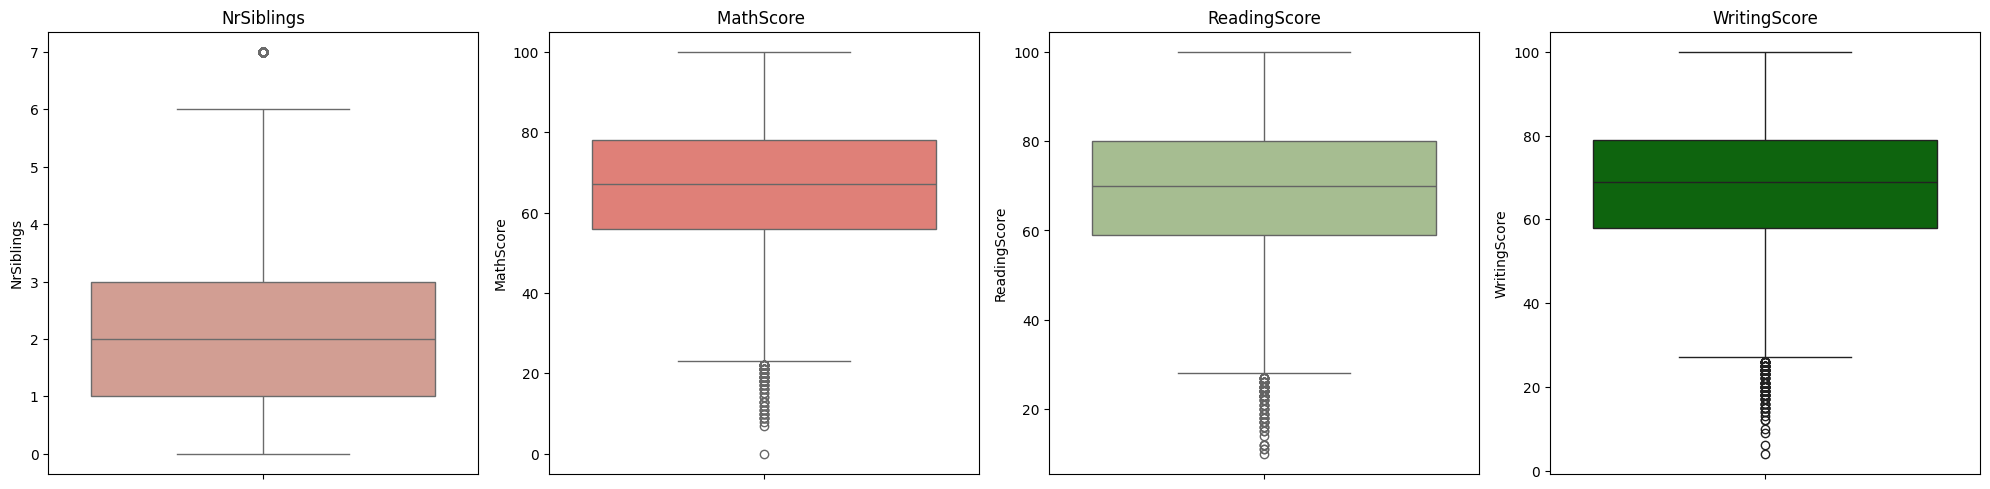

In [68]:
import matplotlib.pyplot as plt  
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  

sns.boxplot(data=df["NrSiblings"], color="#dd9788", ax=axes[0])
axes[0].set_title("NrSiblings")

sns.boxplot(data=df["MathScore"], color="#f07167", ax=axes[1])
axes[1].set_title("MathScore ")

sns.boxplot(data=df["ReadingScore"], color="#a6c48a", ax=axes[2])
axes[2].set_title("ReadingScore")

sns.boxplot(data=df["WritingScore"], color="#007200", ax=axes[3])
axes[3].set_title("WritingScore")

plt.tight_layout()
plt.show()

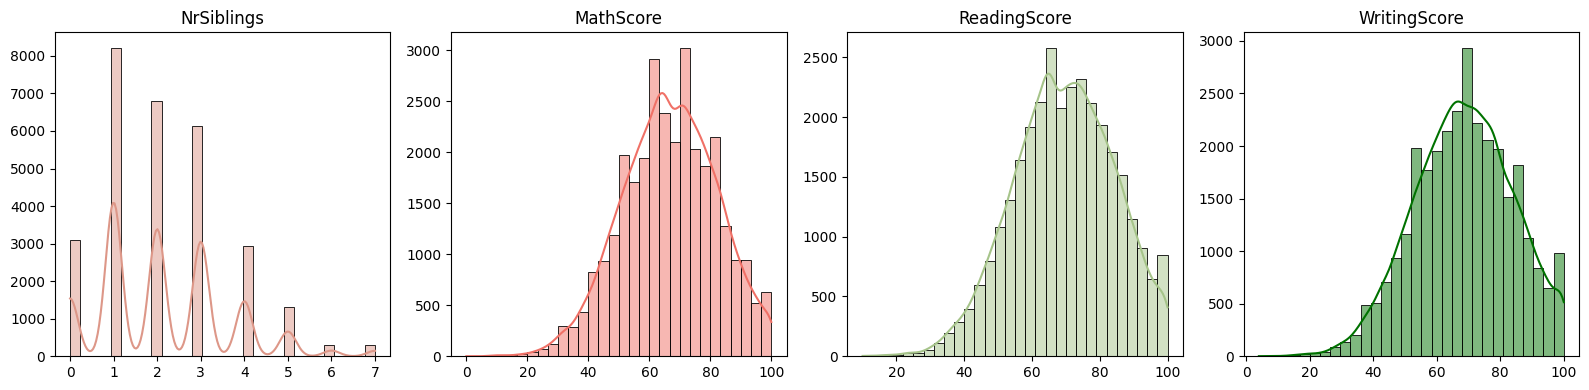

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, len(numerical_columns), figsize=(len(numerical_columns) * 4, 4))

if len(numerical_columns) == 1:
    axes = [axes] 
colors = ["#dd9788","#f07167","#a6c48a","#007200"]
for ax, col, color in zip(axes, numerical_columns, colors):
    sns.histplot(df[col], bins=30, kde=True, color = color, edgecolor="black", ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


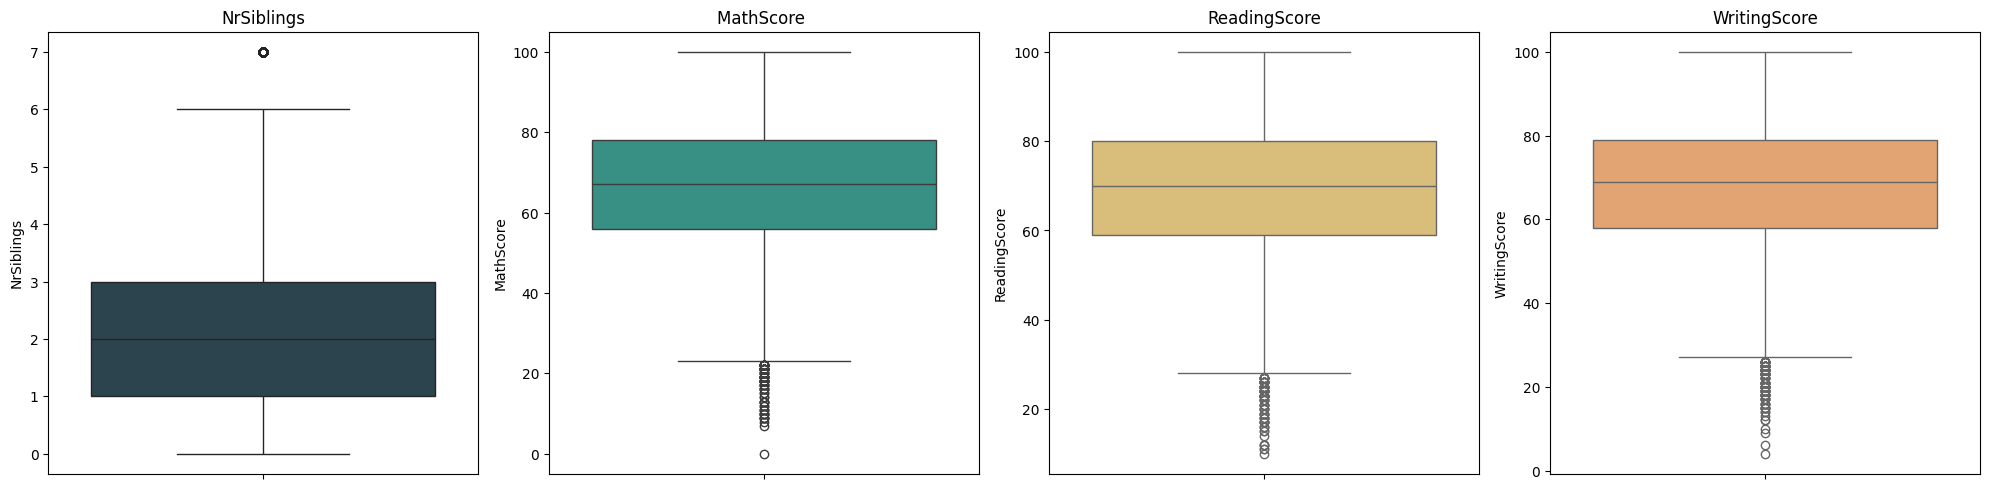

In [70]:
import matplotlib.pyplot as plt  
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  

sns.boxplot(data=df["NrSiblings"], color="#264653", ax=axes[0])
axes[0].set_title("NrSiblings")

sns.boxplot(data=df["MathScore"], color="#2a9d8f", ax=axes[1])
axes[1].set_title("MathScore ")

sns.boxplot(data=df["ReadingScore"], color="#e9c46a", ax=axes[2])
axes[2].set_title("ReadingScore")

sns.boxplot(data=df["WritingScore"], color="#f4a261", ax=axes[3])
axes[3].set_title("WritingScore")

plt.tight_layout()
plt.show()

In [71]:
print(df[numerical_columns].skew())



NrSiblings      0.676266
MathScore      -0.162862
ReadingScore   -0.181288
WritingScore   -0.159830
dtype: float64


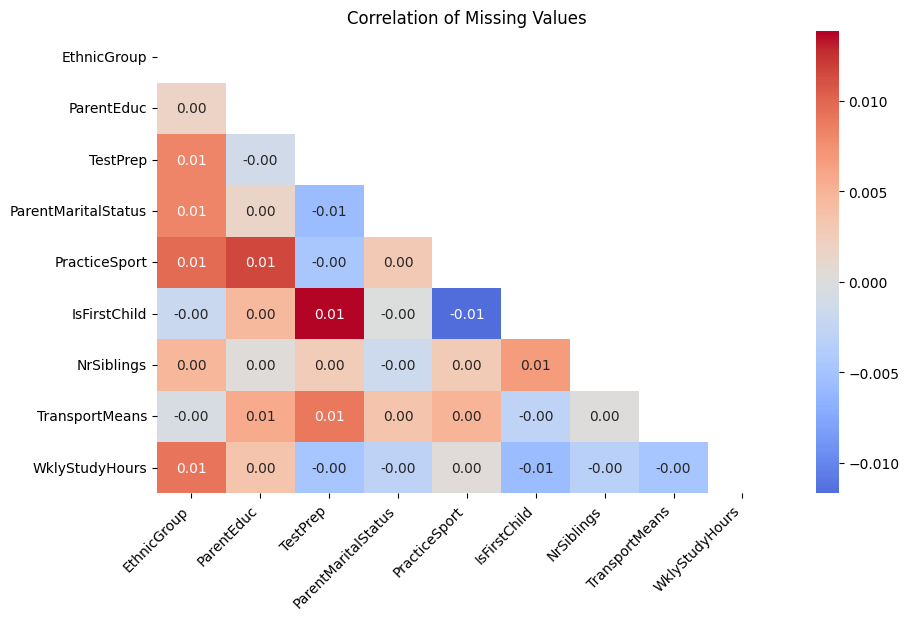

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute missing value correlations, but only for columns with at least one missing value
missing_corr = df.isnull().corr().fillna(0)

# Drop features with no missing values (all-zero rows & columns)
missing_corr = missing_corr.loc[(missing_corr != 0).any(axis=1), (missing_corr != 0).any(axis=0)]

# Ensure symmetry
missing_corr = (missing_corr + missing_corr.T) / 2

# Create mask for upper triangle
mask = np.triu(np.ones_like(missing_corr, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(missing_corr, mask=mask, annot=True, cmap="coolwarm", center=0, fmt=".2f", xticklabels=True, yticklabels=True)
plt.title("Correlation of Missing Values")
plt.xticks(rotation=45, ha="right")  # Ensure labels align correctly
plt.show()




In [73]:
df.dropna(inplace=True)

In [74]:
from sklearn import preprocessing

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store the mappings
category_mappings = {}

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    label_encoder = preprocessing.LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping of categories to numbers
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the category mappings for each encoded column
for col, mapping in category_mappings.items():
    print(f"\nCategory Mapping for '{col}':")
    for category, encoded_value in mapping.items():
        print(f"{category} → {encoded_value}")

# Print unique encoded values for each column
print("\nEncoded Values in Data:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Category Mapping for 'Gender':
female → 0
male → 1

Category Mapping for 'EthnicGroup':
group A → 0
group B → 1
group C → 2
group D → 3
group E → 4

Category Mapping for 'ParentEduc':
associate's degree → 0
bachelor's degree → 1
high school → 2
master's degree → 3
some college → 4
some high school → 5

Category Mapping for 'LunchType':
free/reduced → 0
standard → 1

Category Mapping for 'TestPrep':
completed → 0
none → 1

Category Mapping for 'ParentMaritalStatus':
divorced → 0
married → 1
single → 2
widowed → 3

Category Mapping for 'PracticeSport':
never → 0
regularly → 1
sometimes → 2

Category Mapping for 'IsFirstChild':
no → 0
yes → 1

Category Mapping for 'TransportMeans':
private → 0
school_bus → 1

Category Mapping for 'WklyStudyHours':
5 - 10 → 0
< 5 → 1
> 10 → 2

Encoded Values in Data:
Gender: [0 1]
EthnicGroup: [1 2 3 0 4]
ParentEduc: [3 4 0 2 5 1]
LunchType: [1 0]
TestPrep: [1 0]
ParentMaritalStatus: [2 1 3 0]
PracticeSport: [2 1 0]
IsFirstChild: [1 0]
TransportMeans: [1 

In [76]:
df['TotalScore']=df['MathScore']+df['ReadingScore']+df['WritingScore']

In [80]:
df.sample(15)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore
4195,0,2,1,1,0,1,1,1,4.0,1,0,73,78,90,241
23990,1,3,1,1,1,1,2,0,2.0,1,1,73,65,69,207
26756,1,0,5,1,1,1,2,1,1.0,1,0,82,65,64,211
23370,1,4,3,1,1,1,1,1,4.0,1,2,91,92,88,271
26382,1,1,2,0,1,0,2,0,2.0,0,0,66,56,51,173
23420,1,2,2,1,1,1,1,0,1.0,1,1,47,41,37,125
2266,1,3,3,1,1,1,2,1,0.0,1,0,99,90,93,282
23669,0,2,2,0,1,1,1,0,1.0,0,2,62,61,64,187
6231,1,1,2,1,0,1,2,0,3.0,0,0,65,60,62,187
12554,1,1,0,1,0,2,2,0,5.0,1,1,79,74,76,229
